# Introduction


This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

# Context


Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.


*   Pregnancies: Number of times pregnant
*   Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm/Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)




Outcome: Class variable (0 or 1)
Sources:
(a) Original owners: National Institute of Diabetes and Digestive and
Kidney Diseases
(b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
Research Center, RMI Group Leader
Applied Physics Laboratory
The Johns Hopkins University
Johns Hopkins Road
Laurel, MD 20707
(301) 953-6231
(c) Date received: 9 May 1990

# Data Loading

In [1]:
import pandas as pd
import numpy as np 

In [2]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Processing


All columns appear (from df.head() output above) to have 0 values, which should only be possible for the 'Pregnancies' column. Therefore, it seems logical to replace 0 value in other columns, barring 'Pregnancies' and 'Outcome", with NaN in order to fill apropriately and not lose any data points.


In [3]:
cols_to_nan = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df[cols_to_nan] = df[cols_to_nan].replace({'0' : np.nan, 0: np.nan})

In [4]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Replace NaN values with mean values of those rows:

In [5]:
df['Glucose'] = df['Glucose'].fillna(df.Glucose.mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df.BloodPressure.mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df.SkinThickness.mean())
df['Insulin'] = df['Insulin'].fillna(df.Insulin.mean())
df['BMI'] = df['BMI'].fillna(df.BMI.mean())

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object

# Data Visualization

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


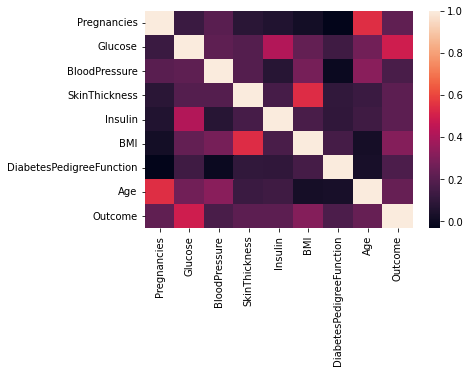

In [9]:
corr = df.corr()

sns.heatmap(corr,
            xticklabels = corr.columns,
            yticklabels = corr.columns)

From the above heatmap regarding the correlation between variables, we see that none of the independent variables have a 0 correlation with the target variable. hence all of these variables can be used in a predictive capacity.

BP(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c65644b50>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7f6c651bc790>, <matplotlib.lines.Line2D object at 0x7f6c650c1750>, <matplotlib.lines.Line2D object at 0x7f6c650d0890>, <matplotlib.lines.Line2D object at 0x7f6c650d0d90>, <matplotlib.lines.Line2D object at 0x7f6c650e3d90>, <matplotlib.lines.Line2D object at 0x7f6c650ea350>, <matplotlib.lines.Line2D object at 0x7f6c650fc390>, <matplotlib.lines.Line2D object at 0x7f6c650fc8d0>, <matplotlib.lines.Line2D object at 0x7f6c6508d950>, <matplotlib.lines.Line2D object at 0x7f6c6508de50>, <matplotlib.lines.Line2D object at 0x7f6c6509de90>, <matplotlib.lines.Line2D object at 0x7f6c650a6410>, <matplotlib.lines.Line2D object at 0x7f6c650b7410>, <matplotlib.lines.Line2D object at 0x7f6c650b7950>, <matplotlib.lines.Line2D object at 0x7f6c65049950>, <matplotlib.lines.Line2D object at 0x7f6c65049e90>, <matplotlib.lines.Line2D object at 0x7f6c6505be10>, <matplotlib.lines.Line2D

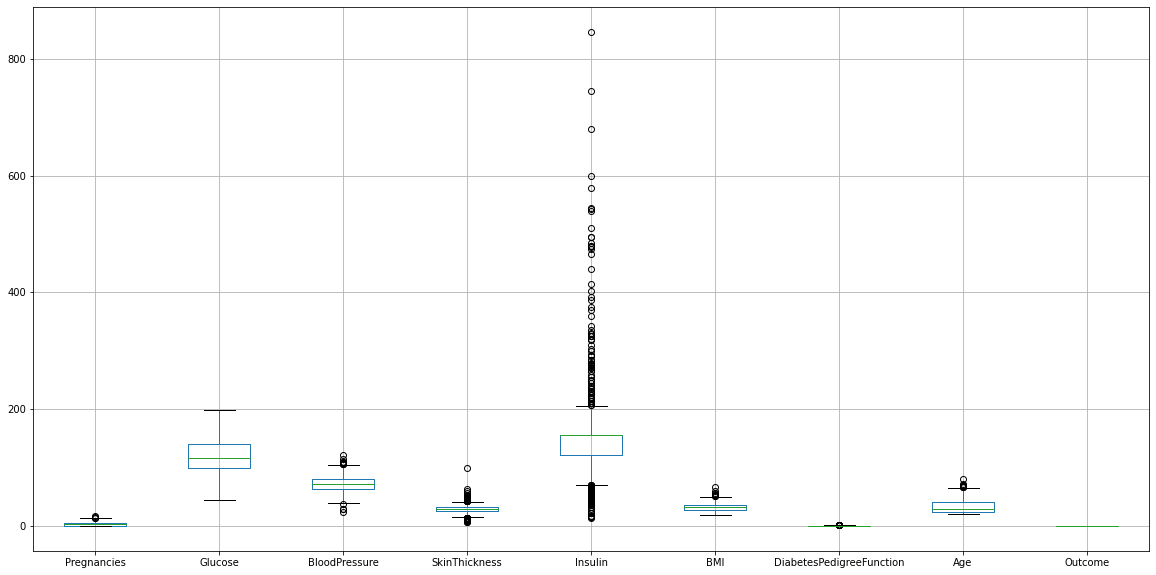

In [10]:
pd.DataFrame.boxplot(df, return_type='both', figsize=(20,10))

Numerous outliers present as shown by the above boxplots, therefore it would be wise to remove them. A function should be created to achieve this.


In [11]:
from scipy import stats
df1 = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [12]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.00000,719.000000,719.000000
mean,3.841446,120.047891,72.290370,28.768993,146.020735,32.139245,0.44922,32.922114,0.336579
std,3.279022,29.642216,11.327116,8.154910,56.968123,6.475020,0.28279,11.309623,0.472868
min,0.000000,44.000000,38.000000,7.000000,15.000000,18.200000,0.07800,21.000000,0.000000
25%,1.000000,99.000000,64.000000,25.000000,120.000000,27.400000,0.24200,24.000000,0.000000
50%,3.000000,115.000000,72.000000,29.153420,155.548223,32.100000,0.36200,29.000000,0.000000
75%,6.000000,138.000000,80.000000,32.000000,155.548223,36.100000,0.60000,40.000000,1.000000
max,13.000000,199.000000,108.000000,54.000000,402.000000,52.900000,1.46100,68.000000,1.000000


BP(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c65037510>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7f6c64f952d0>, <matplotlib.lines.Line2D object at 0x7f6c64f95810>, <matplotlib.lines.Line2D object at 0x7f6c64fa5850>, <matplotlib.lines.Line2D object at 0x7f6c64fa5d50>, <matplotlib.lines.Line2D object at 0x7f6c64fb5d50>, <matplotlib.lines.Line2D object at 0x7f6c64f3e310>, <matplotlib.lines.Line2D object at 0x7f6c64f50350>, <matplotlib.lines.Line2D object at 0x7f6c64f50890>, <matplotlib.lines.Line2D object at 0x7f6c64f60910>, <matplotlib.lines.Line2D object at 0x7f6c64f60e10>, <matplotlib.lines.Line2D object at 0x7f6c64f72e50>, <matplotlib.lines.Line2D object at 0x7f6c64f7a3d0>, <matplotlib.lines.Line2D object at 0x7f6c64f0b3d0>, <matplotlib.lines.Line2D object at 0x7f6c64f0b910>, <matplotlib.lines.Line2D object at 0x7f6c64f1a910>, <matplotlib.lines.Line2D object at 0x7f6c64f1ae50>, <matplotlib.lines.Line2D object at 0x7f6c64f2cdd0>, <matplotlib.lines.Line2D

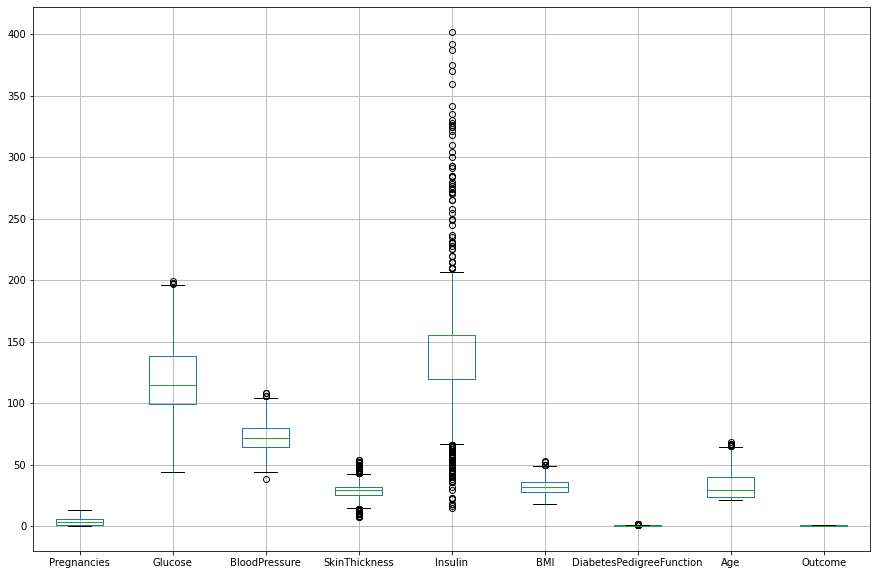

In [13]:
pd.DataFrame.boxplot(df1, return_type='both', figsize=(15,10))

In [14]:
df2 = df1.drop('SkinThickness', axis=1)

Outliers appear to have been removed, data is now ready to move on to the model creation phase.

# Model Creation


As opposed to creating individual machine learning models and assessing the accuracies, I will perform a GridSearchCV in order to evaluate different models with different criterions against each other.

In [15]:
X = df2.drop(['Outcome'], axis=1)
y = df2.Outcome

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

The machine learnong models I will use are:


*   Linear Regression
*   Random Forest
*   Decision Tree
*   Lasso
*   K-neighbors


In [17]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [18]:
algos = {
    'linear regression' : {
        'model' : LinearRegression(),
        'params' : {
            'fit_intercept' : [True, False]
        }
    },
    'lasso' : {
        'model' : Lasso(),
        'params' : {
            'fit_intercept' : [True, False],
            'precompute' : [True, False, 'auto']
        }
    },
    'DecisionTree':{
        'model' : DecisionTreeClassifier(),
        'params' : {
            'criterion' : ['gini', 'entropy'],
            'splitter' : ['best', 'random']
        }
    },
    'RandomForest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators' : [10, 25, 50, 100, 200],
            'criterion' : ['gini', 'entropy'],
        }
    }
}

In [19]:
def GridSearchCV_diabetes(x, y):
  scores = []
  cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)

  for algo_name, config in algos.items():
    gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
    gs.fit(x,y)
    scores.append({
        'model' : algo_name,
        'best_score' : gs.best_score_,
        'best_params' : gs.best_params_
    })
  
  grid_df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
  return grid_df

In [20]:
GridSearchCV_diabetes(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py", line 917, in fit
    % self.precompute
ValueError: precompute should be one of True, False or array-like. Got 'auto'

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/

,model,best_score,best_params
0,linear regression,0.339233,{'fit_intercept': True}
1,lasso,0.254386,"{'fit_intercept': True, 'precompute': True}"
2,DecisionTree,0.713889,"{'criterion': 'gini', 'splitter': 'random'}"
3,RandomForest,0.777778,"{'criterion': 'gini', 'n_estimators': 100}"


# Neural Network Creation

In [21]:
import tensorflow as tf
from tensorflow import keras

In [22]:
df2.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,155.548223,33.6,0.627,50.0,1
1,1,85.0,66.0,155.548223,26.6,0.351,31.0,0
2,8,183.0,64.0,155.548223,23.3,0.672,32.0,1
3,1,89.0,66.0,94.000000,28.1,0.167,21.0,0
5,5,116.0,74.0,155.548223,25.6,0.201,30.0,0


In [23]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [24]:
df2.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.461538,0.670968,0.485714,0.363174,0.443804,0.396963,0.617021,1
1,0.076923,0.264516,0.400000,0.363174,0.242075,0.197397,0.212766,0
2,0.615385,0.896774,0.371429,0.363174,0.146974,0.429501,0.234043,1
3,0.076923,0.290323,0.400000,0.204134,0.285303,0.064353,0.000000,0
5,0.384615,0.464516,0.514286,0.363174,0.213256,0.088937,0.191489,0


In [25]:
X = df2.drop(['Outcome'], axis=1)
y = df2.Outcome

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [27]:
X.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.461538,0.670968,0.485714,0.363174,0.443804,0.396963,0.617021
1,0.076923,0.264516,0.400000,0.363174,0.242075,0.197397,0.212766
2,0.615385,0.896774,0.371429,0.363174,0.146974,0.429501,0.234043
3,0.076923,0.290323,0.400000,0.204134,0.285303,0.064353,0.000000
5,0.384615,0.464516,0.514286,0.363174,0.213256,0.088937,0.191489


In [28]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
362,0.384615,0.380645,1.000000,0.363174,0.605187,0.164136,0.93617
653,0.153846,0.490323,0.228571,0.363174,0.247839,0.272596,0.12766
211,0.000000,0.664516,0.671429,0.363174,0.708934,0.214751,0.06383
615,0.230769,0.400000,0.485714,0.363174,0.219020,0.093275,0.12766
380,0.076923,0.406452,0.485714,0.173127,0.363112,0.537238,0.06383


In [29]:
model = keras.Sequential([
                          keras.layers.Dense(4, input_shape=(7,), activation='relu'),
                          keras.layers.Dense(2, activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid')
])

In [30]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [32]:
model.fit(X_train, y_train, epochs=500)

Epoch 1/500
18/18 [==============================] - 0s 6ms/step - loss: 0.4046 - accuracy: 0.8157
Epoch 2/500
18/18 [==============================] - 0s 6ms/step - loss: 0.4048 - accuracy: 0.8139
Epoch 3/500
18/18 [==============================] - 0s 7ms/step - loss: 0.4047 - accuracy: 0.8122
Epoch 4/500
18/18 [==============================] - 0s 9ms/step - loss: 0.4046 - accuracy: 0.8157
Epoch 5/500
18/18 [==============================] - 0s 10ms/step - loss: 0.4046 - accuracy: 0.8139
Epoch 6/500
18/18 [==============================] - 0s 7ms/step - loss: 0.4047 - accuracy: 0.8139
Epoch 7/500
18/18 [==============================] - 0s 8ms/step - loss: 0.4051 - accuracy: 0.8139
Epoch 8/500
18/18 [==============================] - 0s 7ms/step - loss: 0.4043 - accuracy: 0.8139
Epoch 9/500
18/18 [==============================] - 0s 7ms/step - loss: 0.4048 - accuracy: 0.8174
Epoch 10/500
18/18 [==============================] - 0s 7ms/step - loss: 0.4045 - accuracy: 0.8157
Epoch 11

In [33]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.5106 - accuracy: 0.7431


[0.5106459259986877, 0.7430555820465088]

In [34]:
yp = model.predict(X_train)

In [35]:
y_pred = []

for value in yp:
  if value > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_train, y_pred)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       385
           1       0.77      0.65      0.70       190

    accuracy                           0.82       575
   macro avg       0.80      0.78      0.79       575
weighted avg       0.82      0.82      0.81       575



Text(69.0, 0.5, 'True')

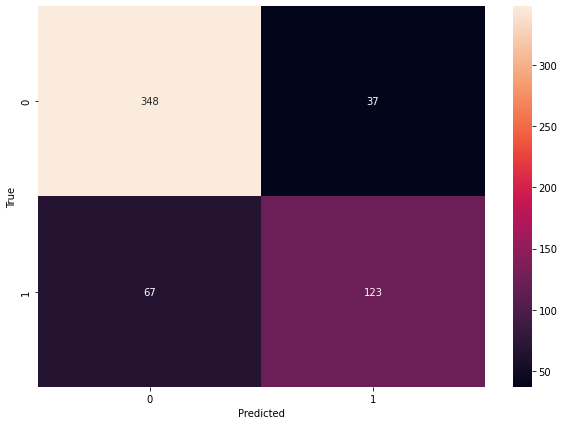

In [37]:
import seaborn as sn

plt.figure(figsize=[10,7])
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

# Smote

In [49]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
  model = keras.Sequential([
                          tf.keras.layers.Dense(7, input_shape=(7,), activation='relu'),
                          
                          tf.keras.layers.Dense(4, activation='relu'),
                          tf.keras.layers.Dropout(0.5),
                          tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(
    optimizer='nadam',
    loss = loss,
    metrics=['accuracy']
  )

  if weights == -1:
    model.fit(X_train, y_train, epochs=250)
  else:
    model.fit(X_train, y_train, epochs=250, class_weight= weights)
  
  print(model.evaluate(X_test, y_test))

  y_preds = model.predict(X_test)
  y_preds = np.round(y_preds)
    
  print("Classification Report: \n", classification_report(y_test, y_preds))
    
  return y_preds

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
y.value_counts()

0    477
1    242
Name: Outcome, dtype: int64

In [41]:
smote = SMOTE(sampling_strategy='minority')

X_sm, y_sm = smote.fit_resample(X,y)

In [42]:
y_sm.value_counts()

1    477
0    477
Name: Outcome, dtype: int64

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [50]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/250
24/24 [==============================] - 1s 6ms/step - loss: 0.7043 - accuracy: 0.4862
Epoch 2/250
24/24 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.5387
Epoch 3/250
24/24 [==============================] - 0s 6ms/step - loss: 0.6853 - accuracy: 0.5387
Epoch 4/250
24/24 [==============================] - 0s 6ms/step - loss: 0.6866 - accuracy: 0.5347
Epoch 5/250
24/24 [==============================] - 0s 6ms/step - loss: 0.6781 - accuracy: 0.5740
Epoch 6/250
24/24 [==============================] - 0s 5ms/step - loss: 0.6765 - accuracy: 0.5557
Epoch 7/250
24/24 [==============================] - 0s 6ms/step - loss: 0.6777 - accuracy: 0.5623
Epoch 8/250
24/24 [==============================] - 0s 5ms/step - loss: 0.6710 - accuracy: 0.6003
Epoch 9/250
24/24 [==============================] - 0s 6ms/step - loss: 0.6668 - accuracy: 0.6291
Epoch 10/250
24/24 [==============================] - 0s 5ms/step - loss: 0.6679 - accuracy: 0.6107
Epoch 11/